In [124]:
import pandas as pd
import numpy as np
import re
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
from textblob import TextBlob
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay


In [16]:
df = pd.read_csv('vaccination_tweets[1].csv')

In [17]:
df.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11020 entries, 0 to 11019
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                11020 non-null  int64 
 1   user_name         11020 non-null  object
 2   user_location     8750 non-null   object
 3   user_description  10340 non-null  object
 4   user_created      11020 non-null  object
 5   user_followers    11020 non-null  int64 
 6   user_friends      11020 non-null  int64 
 7   user_favourites   11020 non-null  int64 
 8   user_verified     11020 non-null  bool  
 9   date              11020 non-null  object
 10  text              11020 non-null  object
 11  hashtags          8438 non-null   object
 12  source            11019 non-null  object
 13  retweets          11020 non-null  int64 
 14  favorites         11020 non-null  int64 
 15  is_retweet        11020 non-null  bool  
dtypes: bool(2), int64(6), object(8)
memory usage: 1.2+ MB


In [19]:
df.isnull().sum()

id                     0
user_name              0
user_location       2270
user_description     680
user_created           0
user_followers         0
user_friends           0
user_favourites        0
user_verified          0
date                   0
text                   0
hashtags            2582
source                 1
retweets               0
favorites              0
is_retweet             0
dtype: int64

In [60]:
df.columns

Index(['id', 'user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source', 'retweets', 'favorites',
       'is_retweet'],
      dtype='object')

In [63]:
text_df = df.drop(['id', 'user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'hashtags', 'source', 'retweets', 'favorites',
       'is_retweet'], axis=1)
text_df.head()


,text,polarity
0,folks said daikon paste could treat cytokine s...,0.0
1,world wrong side history year hopefully bigges...,-0.5
2,coronavirus sputnikv astrazeneca pfizerbiontec...,0.0
3,facts immutable senator even youre ethically s...,0.1
4,explain need vaccine borisjohnson matthancock ...,0.0


In [64]:
print(df['text'].iloc[0], "\n")
print(df['text'].iloc[1], "\n")
print(df['text'].iloc[2], "\n")
print(df['text'].iloc[3], "\n")
print(df['text'].iloc[4], "\n")

folks said daikon paste could treat cytokine storm pfizerbiontech httpstcoxehhimg1kf 

world wrong side history year hopefully biggest vaccination effort weve ev httpstcodlchrzjkhm 

coronavirus sputnikv astrazeneca pfizerbiontech moderna covid_19 russian vaccine created last 24 years httpstcoieylckbr8p 

facts immutable senator even youre ethically sturdy enough acknowledge 1 born httpstcojqgv18kch4 

explain need vaccine borisjohnson matthancock whereareallthesickpeople pfizerbiontech httpstcokxbsrobehq 



In [65]:
text_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10984 entries, 0 to 11019
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   text      10984 non-null  object 
 1   polarity  10984 non-null  float64
dtypes: float64(1), object(1)
memory usage: 257.4+ KB


In [66]:
def data_processing(text):
    text = text.lower()
    text = re.sub(r"https\S+\www\S+htpps\S+", '',text, flags=re.MULTILINE)
    text = re.sub(r'\@w+|\#','',text)
    text = re.sub(r'[^\w\s]','',text)
    text_tokens = word_tokenize(text)
    filtered_text =[w for w in text_tokens if not w in stop_words]
    return " ".join(filtered_text)

In [77]:
text_df['text'] = text_df['text'].apply(data_processing)

In [78]:
df = df.drop_duplicates('text')

In [79]:
stemmer = PorterStemmer()
def stemming(data):
    text =[stemmer.stem(word)for word in data]
    return data


In [80]:
text_df['text'] = text_df['text'].apply(lambda x: stemming(x))

In [81]:
text_df.head()

,text,polarity
0,folks said daikon paste could treat cytokine s...,0.0
1,world wrong side history year hopefully bigges...,-0.5
2,coronavirus sputnikv astrazeneca pfizerbiontec...,0.0
3,facts immutable senator even youre ethically s...,0.1
4,explain need vaccine borisjohnson matthancock ...,0.0


In [82]:
print(df['text'].iloc[0], "\n")
print(df['text'].iloc[1], "\n")
print(df['text'].iloc[2], "\n")
print(df['text'].iloc[3], "\n")
print(df['text'].iloc[4], "\n")

folks said daikon paste could treat cytokine storm pfizerbiontech httpstcoxehhimg1kf 

world wrong side history year hopefully biggest vaccination effort weve ev httpstcodlchrzjkhm 

coronavirus sputnikv astrazeneca pfizerbiontech moderna covid_19 russian vaccine created last 24 years httpstcoieylckbr8p 

facts immutable senator even youre ethically sturdy enough acknowledge 1 born httpstcojqgv18kch4 

explain need vaccine borisjohnson matthancock whereareallthesickpeople pfizerbiontech httpstcokxbsrobehq 



In [83]:
text_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10984 entries, 0 to 11019
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   text      10984 non-null  object 
 1   polarity  10984 non-null  float64
dtypes: float64(1), object(1)
memory usage: 257.4+ KB


In [84]:
def polarity(text):
    return TextBlob(text).sentiment.polarity

In [85]:
text_df['polarity'] = text_df['text'].apply(polarity)

In [86]:
text_df.head(10)


,text,polarity
0,folks said daikon paste could treat cytokine s...,0.000
1,world wrong side history year hopefully bigges...,-0.500
2,coronavirus sputnikv astrazeneca pfizerbiontec...,0.000
3,facts immutable senator even youre ethically s...,0.100
4,explain need vaccine borisjohnson matthancock ...,0.000
5,anyone useful adviceguidance whether covid vac...,0.400
6,bit sad claim fame success vaccination patriot...,-0.100
7,many bright days 2020 best 1 bidenharris winni...,0.675
8,covid vaccine getting covidvaccine covid19 pfi...,0.000
9,covidvaccine states start getting covid19vacci...,0.000


In [87]:
def sentiment(label):
    if label <0:
        return "Negative"
    elif label ==0:
        return "Neutral"
    elif label>0:
        return "Positive"

In [88]:
text_df['sentiment'] = text_df['polarity'].apply(sentiment)

In [89]:
text_df.head()

,text,polarity,sentiment
0,folks said daikon paste could treat cytokine s...,0.0,Neutral
1,world wrong side history year hopefully bigges...,-0.5,Negative
2,coronavirus sputnikv astrazeneca pfizerbiontec...,0.0,Neutral
3,facts immutable senator even youre ethically s...,0.1,Positive
4,explain need vaccine borisjohnson matthancock ...,0.0,Neutral


<Axes: xlabel='sentiment', ylabel='count'>

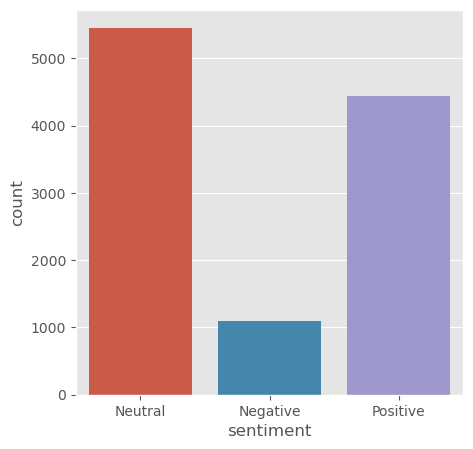

In [90]:
fig = plt.figure(figsize=(5,5))
sns.countplot(x='sentiment', data = text_df)

Text(0.5, 1.0, 'Distribution of sentiments')

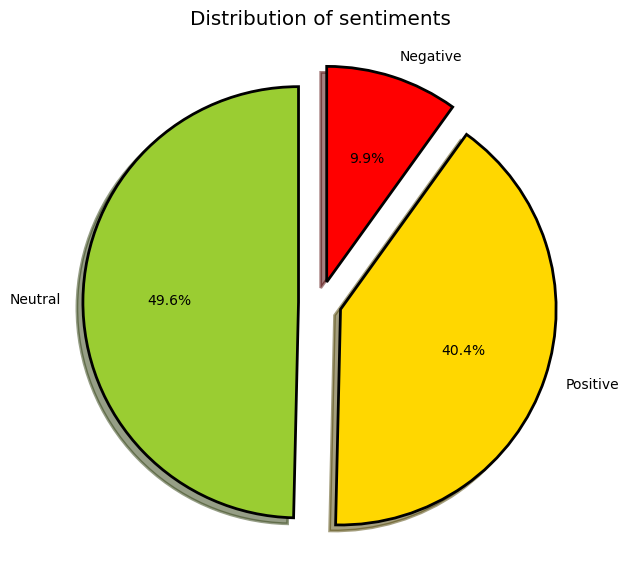

In [91]:
fig = plt.figure(figsize=(7,7))
colors = ("yellowgreen", "gold", "red")
wp = {'linewidth':2, 'edgecolor':"black"}
tags = text_df['sentiment'].value_counts()
explode = (0.1,0.1,0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors = colors,
         startangle=90, wedgeprops = wp, explode = explode, label='')
plt.title('Distribution of sentiments')

In [92]:
pos_tweets = text_df[text_df.sentiment == 'Positive']
pos_tweets = pos_tweets.sort_values(['polarity'], ascending= False)
pos_tweets.head()

,text,polarity,sentiment
10393,drericding thank god best news ive read week c...,1.0,Positive
8776,made germany always best ger pfizerbiontech ht...,1.0,Positive
6792,best news yet pfizercovidvaccine pfizerbiontec...,1.0,Positive
2340,applying emotion pfizerbiontech based best evi...,1.0,Positive
4296,underwhelming performance deputy chair jcvi us...,1.0,Positive


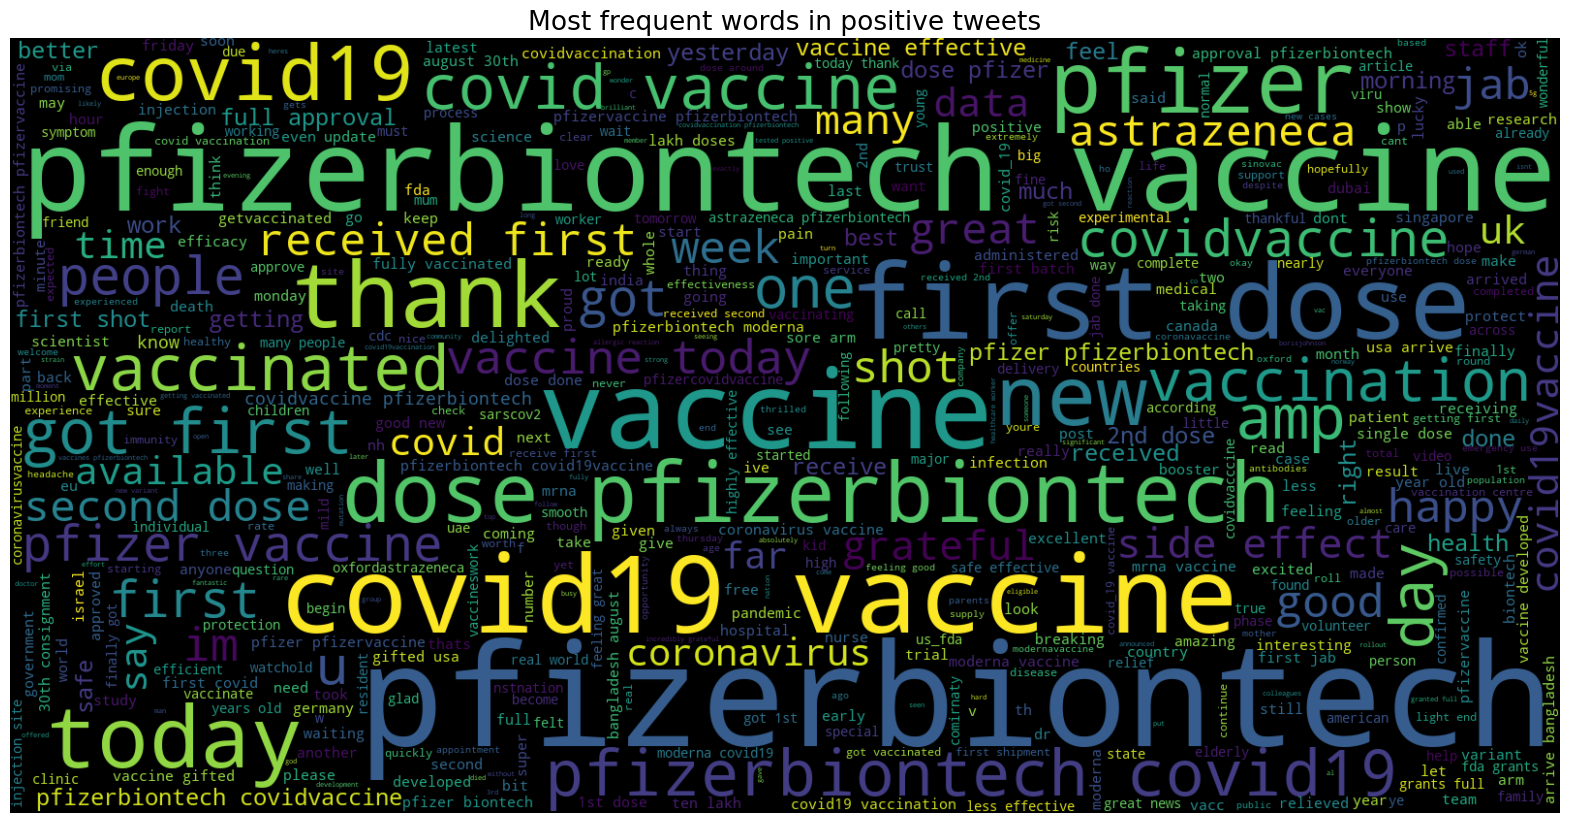

In [93]:
text = ' '.join([word for word in pos_tweets['text']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in positive tweets', fontsize=19)
plt.show()

In [94]:
neg_tweets = text_df[text_df.sentiment == 'Negative']
neg_tweets = neg_tweets.sort_values(['polarity'], ascending= False)
neg_tweets.head()


,text,polarity,sentiment
2912,work skilled nursing facility got first vaccin...,-0.003333,Negative
7256,200321 752308 vaccinations new daily record da...,-0.003409,Negative
2073,ukgovernment cant even vaccinate properly ethi...,-0.004762,Negative
7715,got first dose less waiting time airport vacci...,-0.005556,Negative
7157,nas_k27 second dose due end next month well fa...,-0.006250,Negative


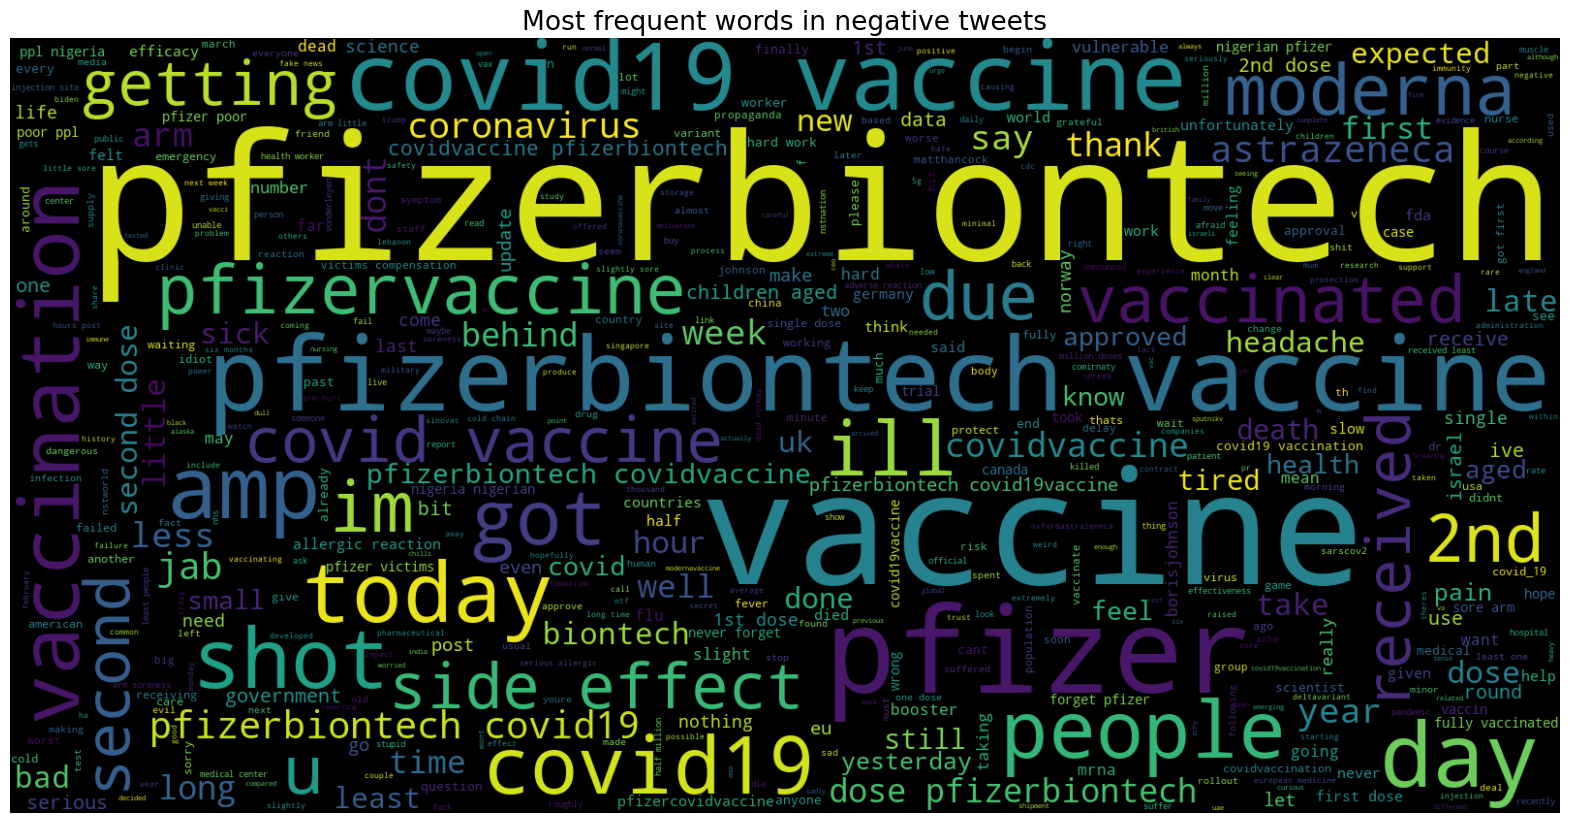

In [95]:
text = ' '.join([word for word in neg_tweets['text']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in negative tweets', fontsize=19)
plt.show()

In [96]:
neutral_tweets = text_df[text_df.sentiment == 'Neutral']
neutral_tweets = neutral_tweets.sort_values(['polarity'], ascending= False)
neutral_tweets.head()

,text,polarity,sentiment
0,folks said daikon paste could treat cytokine s...,0.0,Neutral
7504,gjnyouthcam albertbourla sbancel pfizer bionte...,0.0,Neutral
7530,pfizerbiontech vaccine delivered azerbaijan pf...,0.0,Neutral
7529,vaccine pfizerbiontech nhs vaccineswork chip a...,0.0,Neutral
7527,neurophysik bharatbiotech seruminstindia thela...,0.0,Neutral


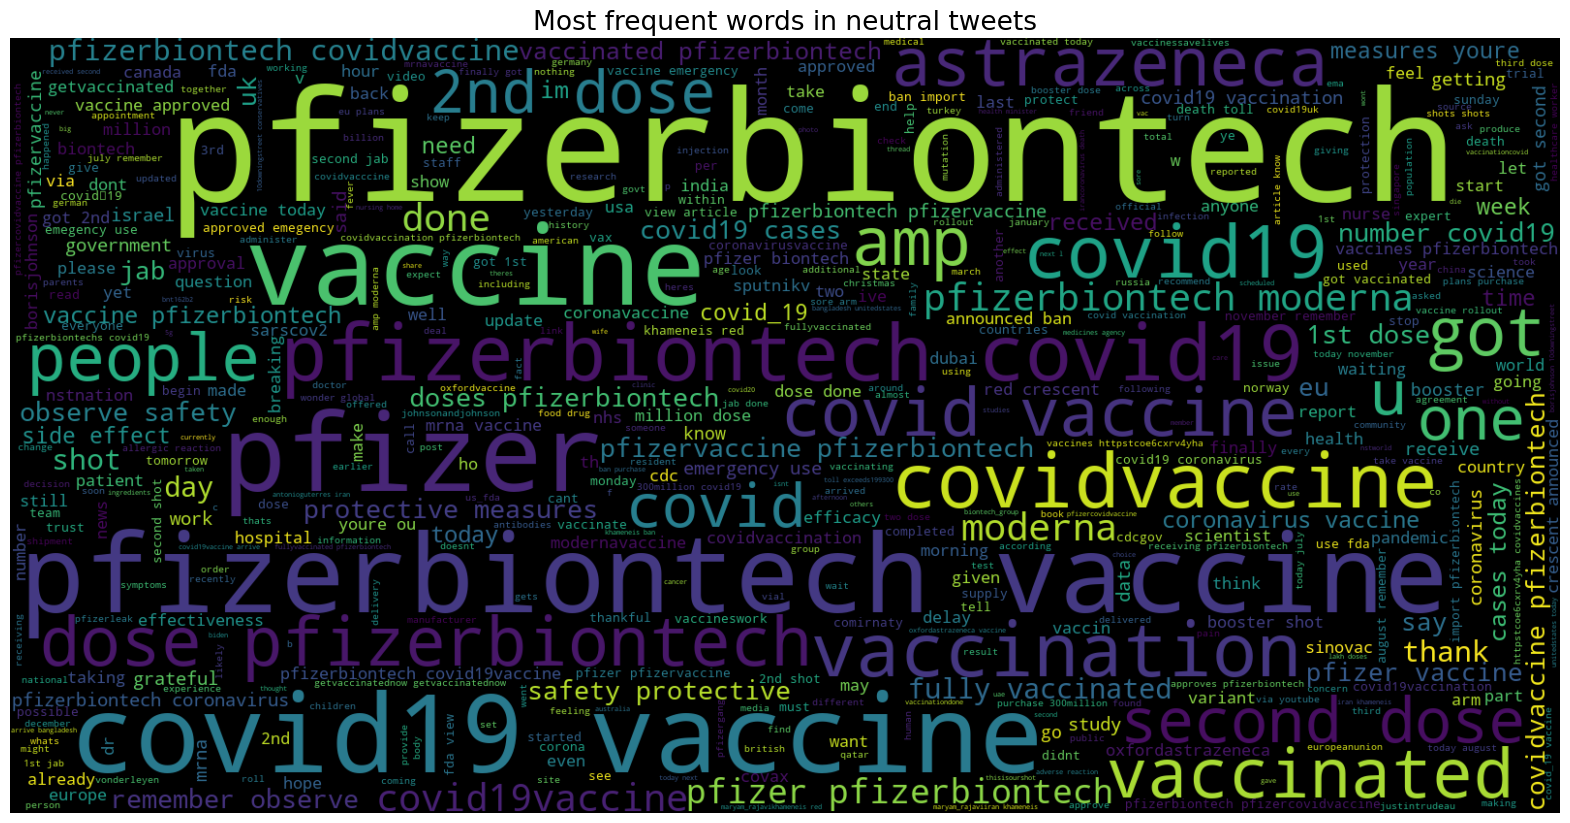

In [97]:
text = ' '.join([word for word in neutral_tweets['text']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in neutral tweets', fontsize=19)
plt.show()

In [98]:
vect = CountVectorizer(ngram_range=(1,2)).fit(text_df['text'])

In [100]:
X = text_df['text']
Y = text_df['sentiment']
X = vect.transform(X)

In [101]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [102]:
print("Size of x_train:", (x_train.shape))
print("Size of y_train:", (y_train.shape))
print("Size of x_test:", (x_test.shape))
print("Size of y_test:", (y_test.shape))

Size of x_train: (8787, 99662)
Size of y_train: (8787,)
Size of x_test: (2197, 99662)
Size of y_test: (2197,)


In [103]:
import warnings
warnings.filterwarnings('ignore')

In [104]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
logreg_pred = logreg.predict(x_test)
logreg_acc = accuracy_score(logreg_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 86.12%


In [105]:
print(confusion_matrix(y_test, logreg_pred))
print("\n")
print(classification_report(y_test, logreg_pred))

[[  55  117   35]
 [   3 1070   12]
 [  12  126  767]]


              precision    recall  f1-score   support

    Negative       0.79      0.27      0.40       207
     Neutral       0.81      0.99      0.89      1085
    Positive       0.94      0.85      0.89       905

    accuracy                           0.86      2197
   macro avg       0.85      0.70      0.73      2197
weighted avg       0.86      0.86      0.85      2197



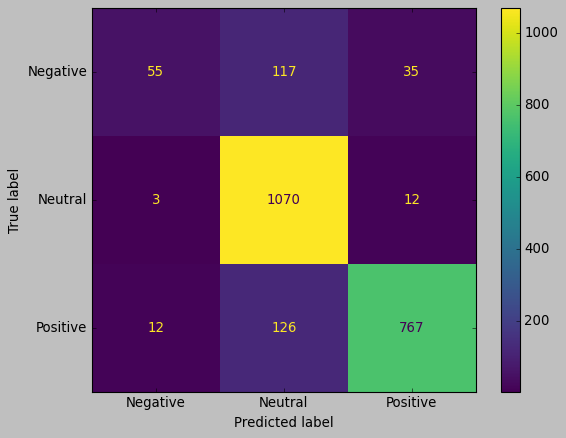

In [106]:
style.use('classic')
cm = confusion_matrix(y_test, logreg_pred, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=logreg.classes_)
disp.plot()

In [107]:
from sklearn.model_selection import GridSearchCV

In [108]:
param_grid={'C':[0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(), param_grid)
grid.fit(x_train, y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10]})

In [109]:
print("Best parameters:", grid.best_params_)

Best parameters: {'C': 10}


In [110]:
y_pred = grid.predict(x_test)


In [111]:
logreg_acc = accuracy_score(y_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 87.16%


In [112]:
print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))

[[  64  109   34]
 [   4 1070   11]
 [  13  111  781]]


              precision    recall  f1-score   support

    Negative       0.79      0.31      0.44       207
     Neutral       0.83      0.99      0.90      1085
    Positive       0.95      0.86      0.90       905

    accuracy                           0.87      2197
   macro avg       0.86      0.72      0.75      2197
weighted avg       0.87      0.87      0.86      2197



In [113]:
from sklearn.svm import LinearSVC

In [114]:
SVCmodel = LinearSVC()
SVCmodel.fit(x_train, y_train)

LinearSVC()

In [116]:
svc_pred = SVCmodel.predict(x_test)
svc_acc = accuracy_score(svc_pred, y_test)
print("test accuracy: {:.2f}%".format(svc_acc*100))

test accuracy: 88.44%


In [117]:
print(confusion_matrix(y_test, svc_pred))
print("\n")
print(classification_report(y_test, svc_pred))

[[  80   95   32]
 [   5 1069   11]
 [  14   97  794]]


              precision    recall  f1-score   support

    Negative       0.81      0.39      0.52       207
     Neutral       0.85      0.99      0.91      1085
    Positive       0.95      0.88      0.91       905

    accuracy                           0.88      2197
   macro avg       0.87      0.75      0.78      2197
weighted avg       0.89      0.88      0.87      2197



In [118]:
grid = {
    'C':[0.01, 0.1, 1, 10],
    'kernel':["linear","poly","rbf","sigmoid"],
    'degree':[1,3,5,7],
    'gamma':[0.01,1]
}
grid = GridSearchCV(SVCmodel, param_grid)
grid.fit(x_train, y_train)

GridSearchCV(estimator=LinearSVC(), param_grid={'C': [0.001, 0.01, 0.1, 1, 10]})

In [119]:
print("Best parameter:", grid.best_params_)

Best parameter: {'C': 10}


In [120]:
y_pred = grid.predict(x_test)

In [121]:
logreg_acc = accuracy_score(y_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 88.48%


In [122]:
print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))

[[  79   96   32]
 [   6 1069   10]
 [  14   95  796]]


              precision    recall  f1-score   support

    Negative       0.80      0.38      0.52       207
     Neutral       0.85      0.99      0.91      1085
    Positive       0.95      0.88      0.91       905

    accuracy                           0.88      2197
   macro avg       0.87      0.75      0.78      2197
weighted avg       0.89      0.88      0.88      2197

